In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import cv2
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import layers
import datetime
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import pandas as pd
#import tensorflow_datasets as tfds

In [62]:
%cd "C:\Users\Dawid\Desktop\kurs\jdszr4-animalsi\gesty"
train = pd.read_csv("dane\sign_mnist_train.csv")
train.head()

C:\Users\Dawid\Desktop\kurs\jdszr4-animalsi\gesty


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [83]:
test = pd.read_csv("dane\sign_mnist_test.csv")
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [85]:
#sprawdzmy braki
print("train ",sum(train.isna().sum()))
print("test ",sum(test.isna().sum()))

train  0
test  0


In [88]:
Y_train = train.iloc[:,0]
X_train = train.iloc[:,1:]
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()

Y_test = test.iloc[:,0]
X_test = test.iloc[:,1:]
X_test = X_test.to_numpy()
Y_test= Y_test.to_numpy()

In [89]:
#zmiana kształtu naszego zbioru
X_train = X_train.reshape(-1,28,28)
X_test = X_test.reshape(-1,28,28)

In [90]:
#zmiana ksztaltu naszego zbioru Y
Y_train = Y_train.reshape(-1,1)
Y_train = OneHotEncoder(sparse = False).fit_transform(Y_train)

Y_test = Y_test.reshape(-1,1)
Y_test = OneHotEncoder(sparse = False).fit_transform(Y_test)

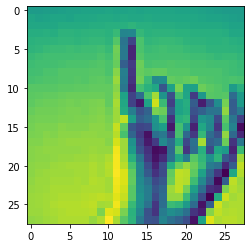

In [68]:
#zobrazujmy sobie obraz
plt.imshow(X_train[6,])
plt.show()

In [79]:
#nasze klasy sa zbalansowane
for i in range(0, 24):
    print("Klasa ", i, sum(Y_train[:,i]))

Klasa  0 1126.0
Klasa  1 1010.0
Klasa  2 1144.0
Klasa  3 1196.0
Klasa  4 957.0
Klasa  5 1204.0
Klasa  6 1090.0
Klasa  7 1013.0
Klasa  8 1162.0
Klasa  9 1114.0
Klasa  10 1241.0
Klasa  11 1055.0
Klasa  12 1151.0
Klasa  13 1196.0
Klasa  14 1088.0
Klasa  15 1279.0
Klasa  16 1294.0
Klasa  17 1199.0
Klasa  18 1186.0
Klasa  19 1161.0
Klasa  20 1082.0
Klasa  21 1225.0
Klasa  22 1164.0
Klasa  23 1118.0


In [100]:
#normalizacja
X_train = X_train/255.0
X_test = X_test/255.0

In [106]:
X_train[6,].shape

(28, 28)